<a href="https://colab.research.google.com/github/Mohanee28/06July2024/blob/main/s_UShoney%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background:

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective:

To visualise how honey production is changed over the years (1998-2016) in the United States.

#Key questions to be answered:

How has honey production yield changed from 1998 to 2016?
Over time, what are the major production trends been across the states?
Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

#Dataset:

state: Various states of U.S.

colonies_number: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year

yieldpercol: Honey yield per colony. Unit is pounds

production: Total production (numcol x yieldpercol). Unit is pounds
stocks: Refers to stocks held by producers. Unit is pounds

average price: Refers to average price per pound based on expanded sales. The unit is dollars.

stocks : represent the amount of honey that beekeepers have stored

value of production: Value of production (totalprod x priceperlb). The unit is dollars.

year: Year of production

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("US_honey.csv")
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [ ]:
df.shape

(1115, 9)

In [ ]:
#Check the datatype of the variables to make sure that the data is read in properly

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [ ]:
df.dtypes

Unnamed: 0               int64
state                   object
colonies_number          int64
yield_per_colony         int64
production               int64
stocks                   int64
average_price          float64
value_of_production      int64
year                     int64
dtype: object

# Observations:

state is object data type

year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python.

All the other variables are numerical and there for their python data types (float64 and int64) are ok.

In [ ]:
df.year = df.year.astype('category') # To convert year into categories

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           1115 non-null   int64   
 1   state                1115 non-null   object  
 2   colonies_number      1115 non-null   int64   
 3   yield_per_colony     1115 non-null   int64   
 4   production           1115 non-null   int64   
 5   stocks               1115 non-null   int64   
 6   average_price        1115 non-null   float64 
 7   value_of_production  1115 non-null   int64   
 8   year                 1115 non-null   category
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 72.2+ KB


In [ ]:
# statistical summary

df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07


Observations:

Number of colonies in every state are spread over a huge range. Ranging from 2000 to 550000.


As expected, standard deviation of colonies_number is very high

yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 155 pounds.

Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.

In [ ]:
# to check null values

df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [ ]:
df= df.drop(columns=["Unnamed: 0"])

In [ ]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [ ]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
df['state'].nunique()

44

In [ ]:
df['state'].value_counts()

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

In [ ]:
df['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1110    2021
1111    2021
1112    2021
1113    2021
1114    2021
Name: year, Length: 1115, dtype: category
Categories (27, int64): [1995, 1996, 1997, 1998, ..., 2018, 2019, 2020, 2021]

In [ ]:
2021-1995

26

In [ ]:
df['year'].nunique()

27

In [ ]:
df2= df.sort_values("production", ascending=False)
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


In [ ]:
df['production'].max()

39060000

# Observation

In california there was maximum production in year 1995

In [ ]:
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

<ipython-input-27-93646883673a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr() # creating a 2-D Matrix with correlation plots


,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
colonies_number,1.000000,0.201100,0.736643,0.800533,-0.165758,0.905332
yield_per_colony,0.201100,1.000000,0.413410,0.344385,-0.187149,0.210358
production,0.736643,0.413410,1.000000,0.807947,-0.194206,0.520972
stocks,0.800533,0.344385,0.807947,1.000000,-0.173171,0.689202
average_price,-0.165758,-0.187149,-0.194206,-0.173171,1.000000,-0.078820
value_of_production,0.905332,0.210358,0.520972,0.689202,-0.078820,1.000000


<Axes: >

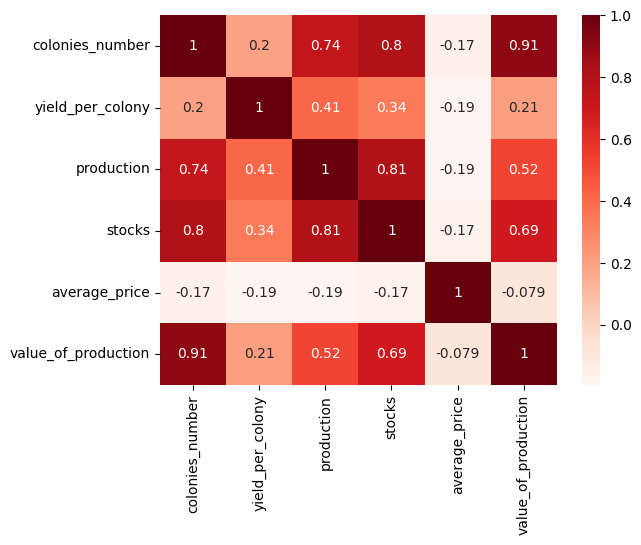

In [ ]:
sns.heatmap(correlation, annot=True, cmap='Reds')

Observations:

Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.

Yield per colony does not have a high correlation with any of the features that we have in our dataset.

Same is the case with priceperlb.

Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.

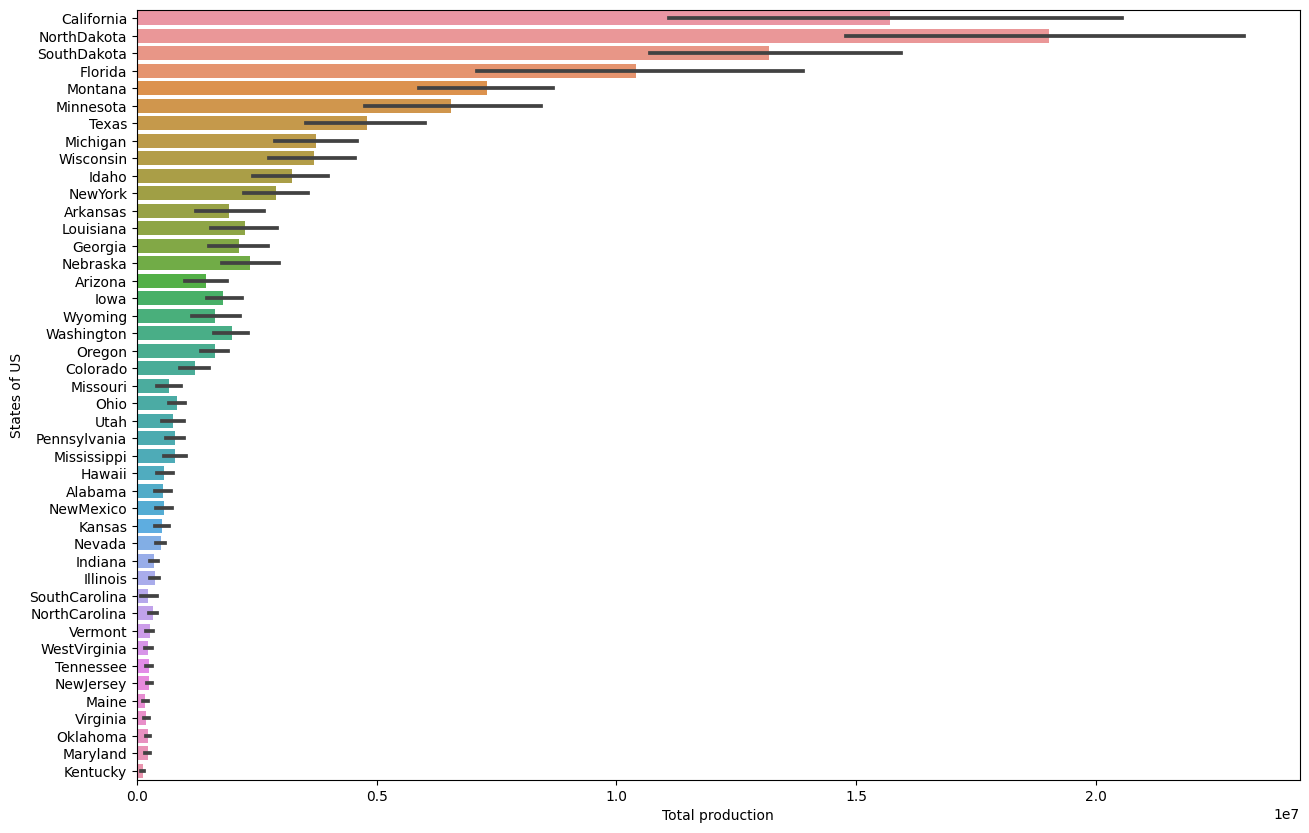

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(x=df2["production"], y=df2['state'])
plt.xlabel("Total production")
plt.ylabel("States of US")
plt.show()

top 5 honey production states are

1.NorthDakota

2.Califoria

3.south Dakota

4.Florida

5.Montana

In [ ]:
df1 = df.groupby("year").mean()

<ipython-input-39-89421792dd67>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby("year").mean()


In [ ]:
df1

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06


In [ ]:
df1= df1.reset_index()
df1

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


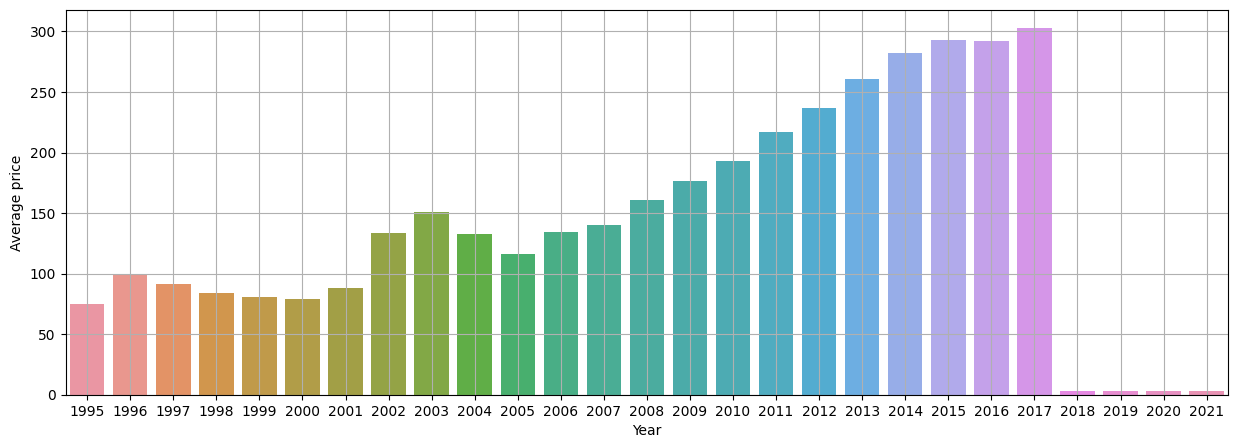

In [ ]:
#the mac=ximum average price and the minimum average price of honey within year 1995 till 2021
plt.figure(figsize=(15,5))
sns.barplot(x=df1['year'], y=df1["average_price"])
plt.xlabel("Year")
plt.ylabel("Average price")
plt.grid(True)
plt.show()

# Minimum price was after 2017, a rapid decline

# Maximum price was in year 2017,2016

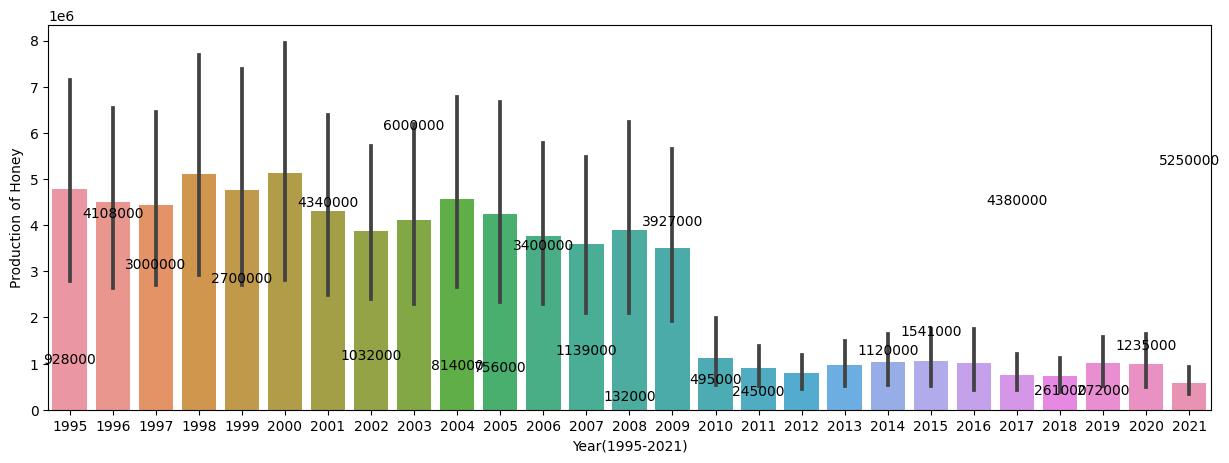

Text(1114, 242000, '242000')

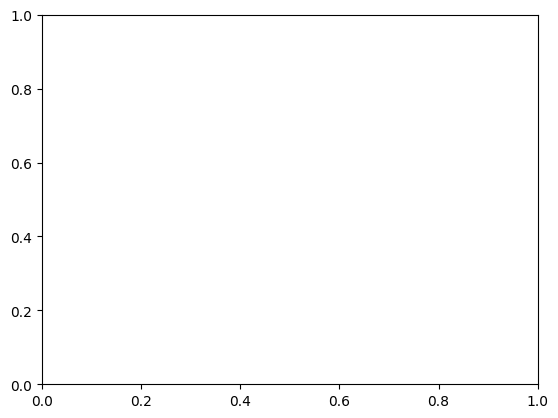

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['year'], y=df['production'])

for index , value in enumerate(df['production']):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.xlabel("Year(1995-2021)")
plt.ylabel("Production of Honey")
plt.show()


plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# This line uses the plt.annotate function to add an annotation to the plot at the specified coordinates.
# str(value) converts the value to a string so that it can be displayed as text in the annotation.
# xy=(index, value) specifies the coordinates where the annotation will be placed. The index corresponds to the x-coordinate, and the value corresponds to the y-coordinate.
# ha='center' sets the horizontal alignment of the annotation text to the center with respect to the specified coordinates.
# va='bottom' sets the vertical alignment of the annotation text to the bottom with respect to the specified coordinates.

# #Let us look at the overall trend of honey production in the US over the years

<ipython-input-49-8aafbdb223b9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='production', data=df, estimator=sum, ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

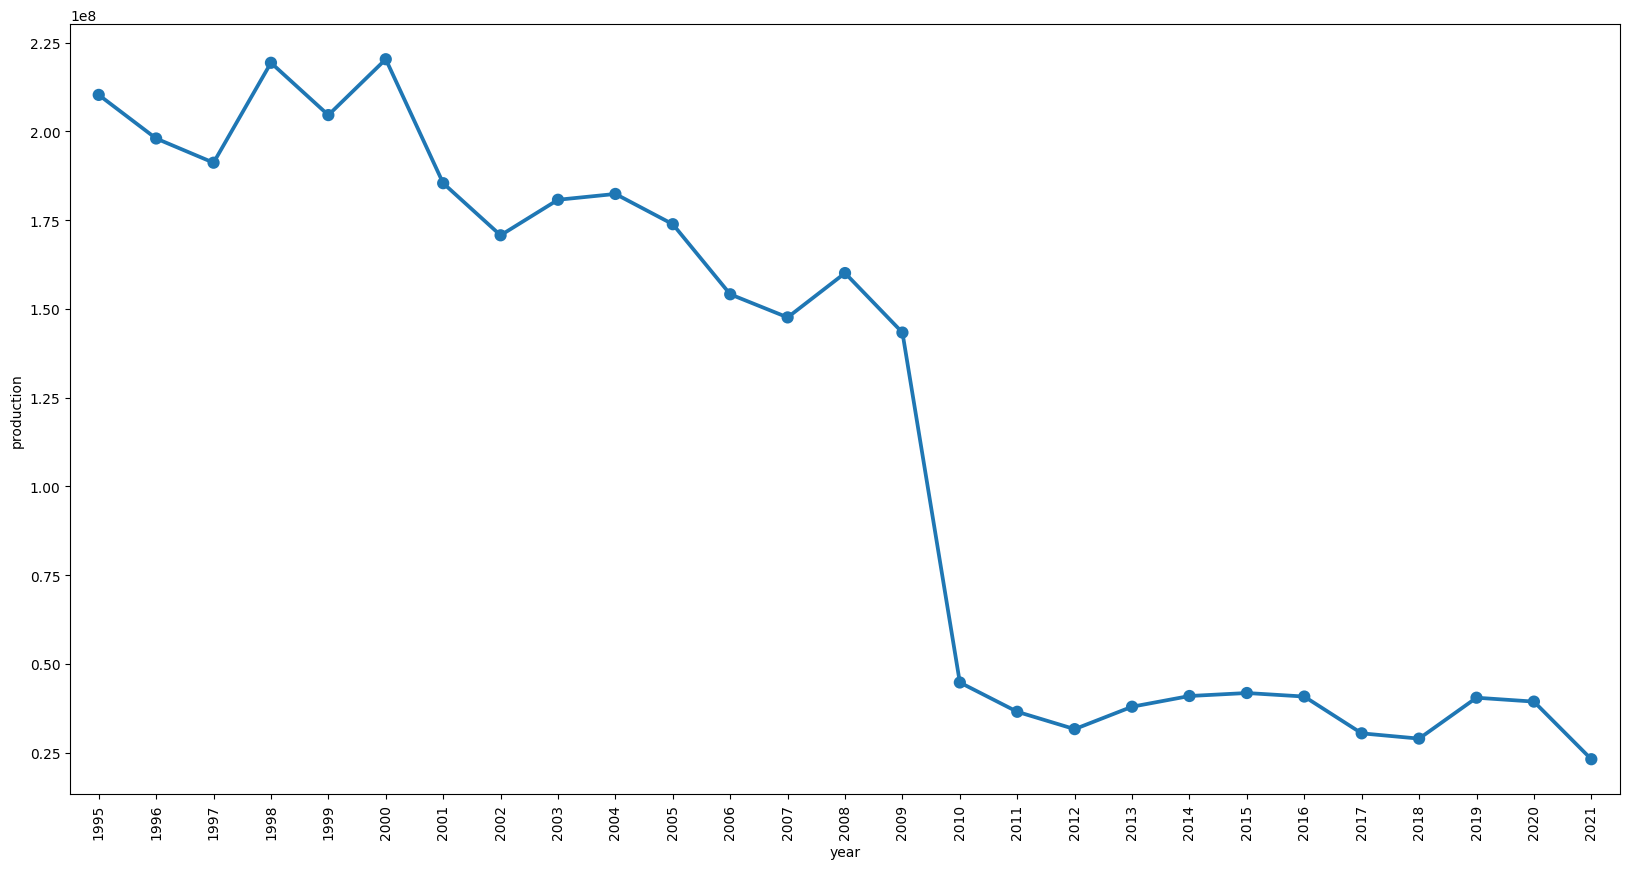

In [ ]:
plt.figure(figsize = (20,10))
sns.pointplot(x='year', y='production', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

In [ ]:
# the following code to check the actual values
df.groupby(['year'])['production'].sum().reset_index()

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


Observations:

The overall honey production in the US has been decresing over the years.

Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

# Variation in the number of colonies over the years

<ipython-input-52-7cde0812fe00>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='colonies_number', data=df, ci=None, estimator=sum)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

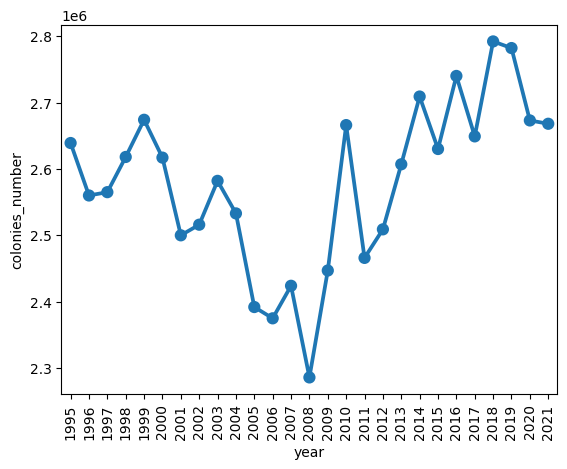

In [ ]:
sns.pointplot(x='year', y='colonies_number', data=df, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls

Observations:

The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.

It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

# #Variation of yield per colony over the years

<ipython-input-53-3f3429cbf980>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='yield_per_colony', data=df, estimator=sum, ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

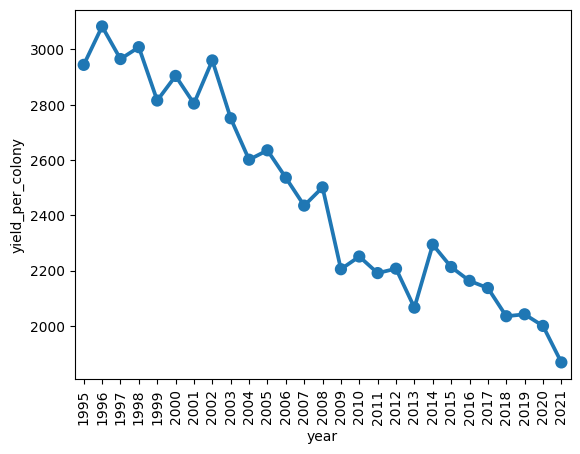

In [ ]:
sns.pointplot(x='year', y='yield_per_colony', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

Onservation:

In contrast to number of colonies, the yield per colony has been decreasing since 1998.

This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony

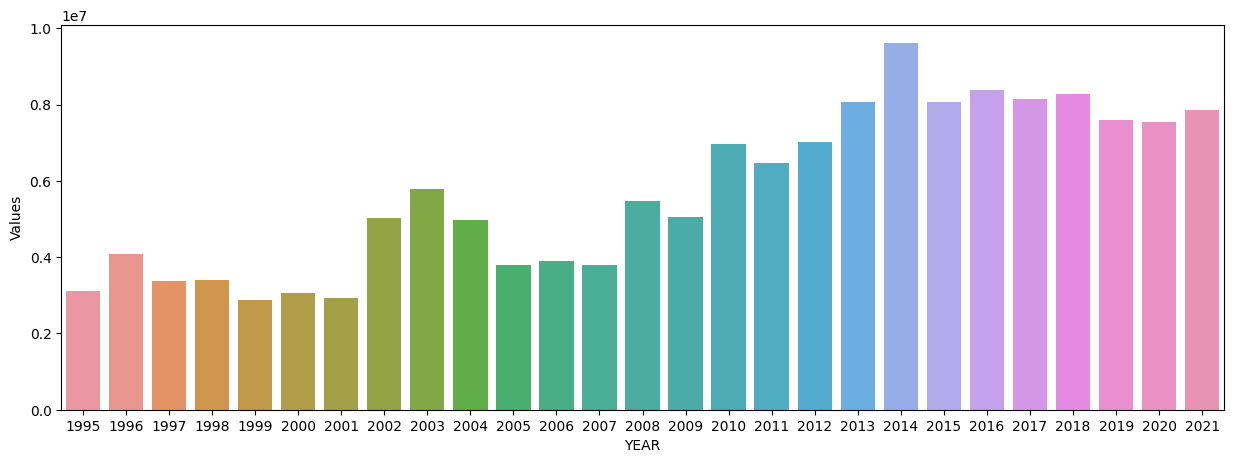

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(x=df1['year'], y=df1["value_of_production"])

plt.xlabel("YEAR")
plt.ylabel("Values")
plt.show()

# Let us look at the production trend at state level

In [ ]:
df2=df.groupby(['state']).sum()
df2=df2.reset_index()
df2

<ipython-input-55-90508986ded6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby(['state']).sum()


,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000
3,California,10135000,1426,423876000,137611000,2954.06,653982000
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000
6,Georgia,1917000,1354,57426000,9932000,3260.68,145945000
7,Hawaii,296000,2802,15420000,3508000,3719.13,49888000
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000
9,Illinois,236000,1562,9864000,4957000,5842.43,36782000


<ipython-input-56-c51406ea764e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='production', data=df, estimator=sum, ci=None, hue = 'state')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

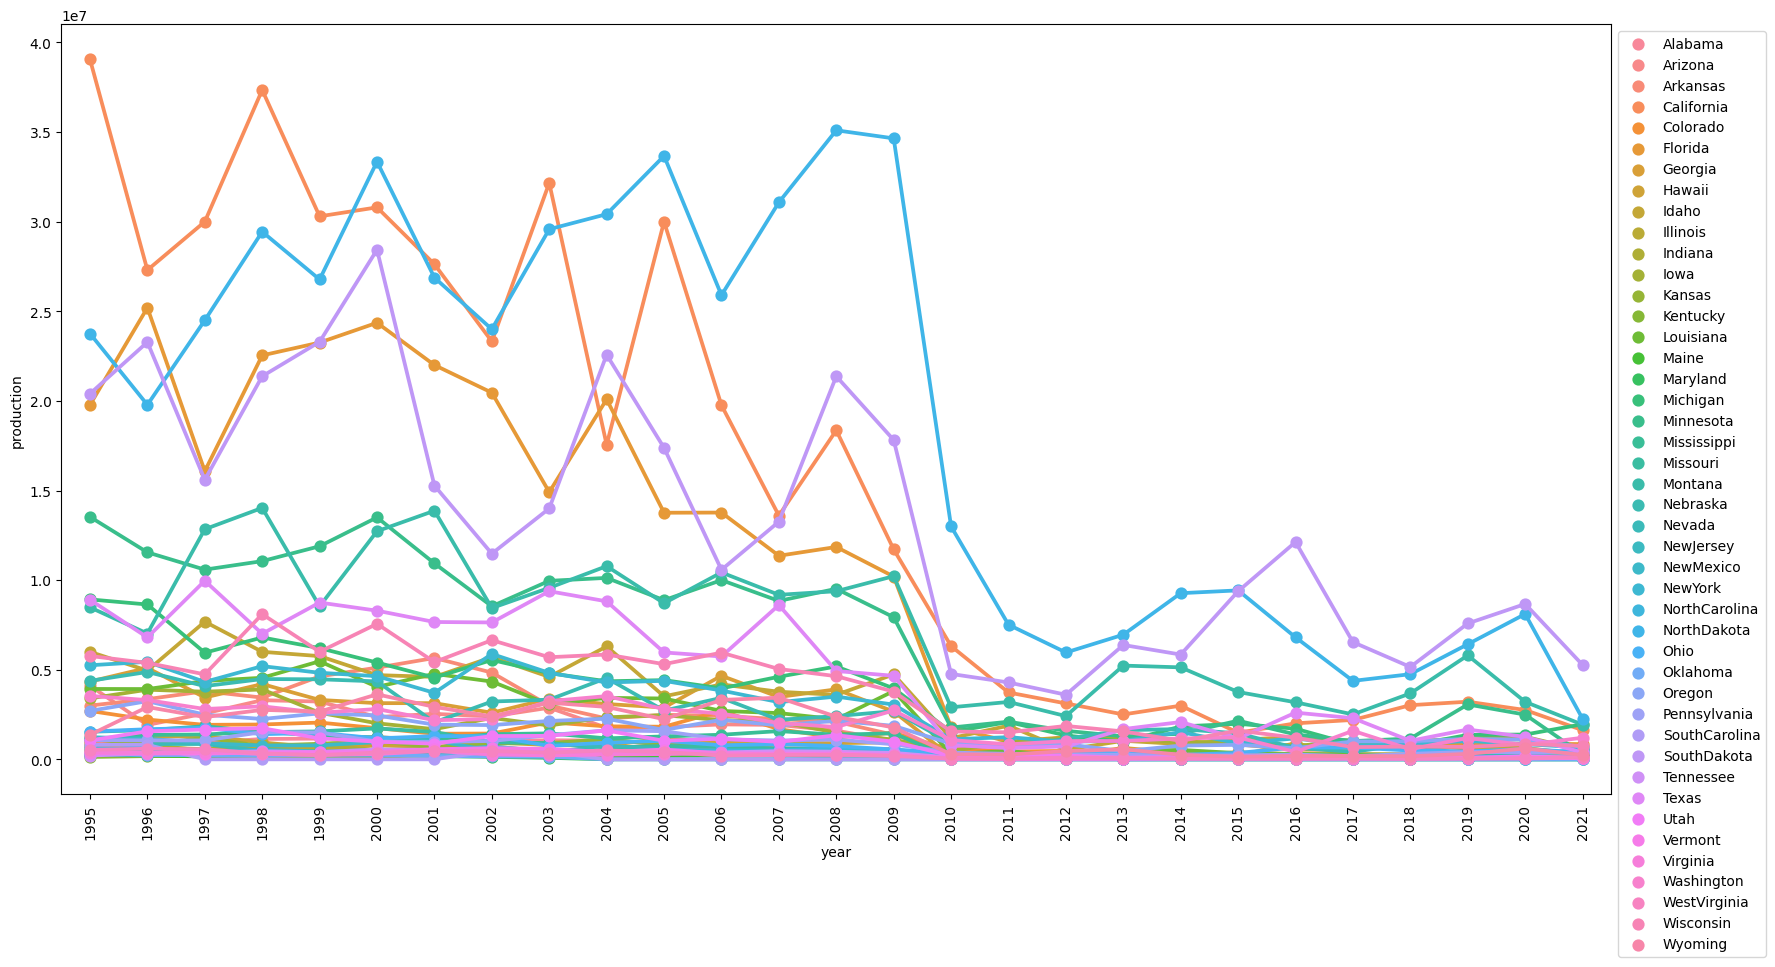

In [ ]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(x='year', y='production', data=df, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
#bbox_to_anchor=(x, y): This parameter specifies the coordinates (x, y) that determine where the legend should be placed.
#The coordinates are relative to the axes of the plot. The (0, 0) point is the lower-left corner of the plot,
#and the (1, 1) point is the upper-right corner of the plot.
plt.xticks(rotation=90) # To rotate the x axis labls

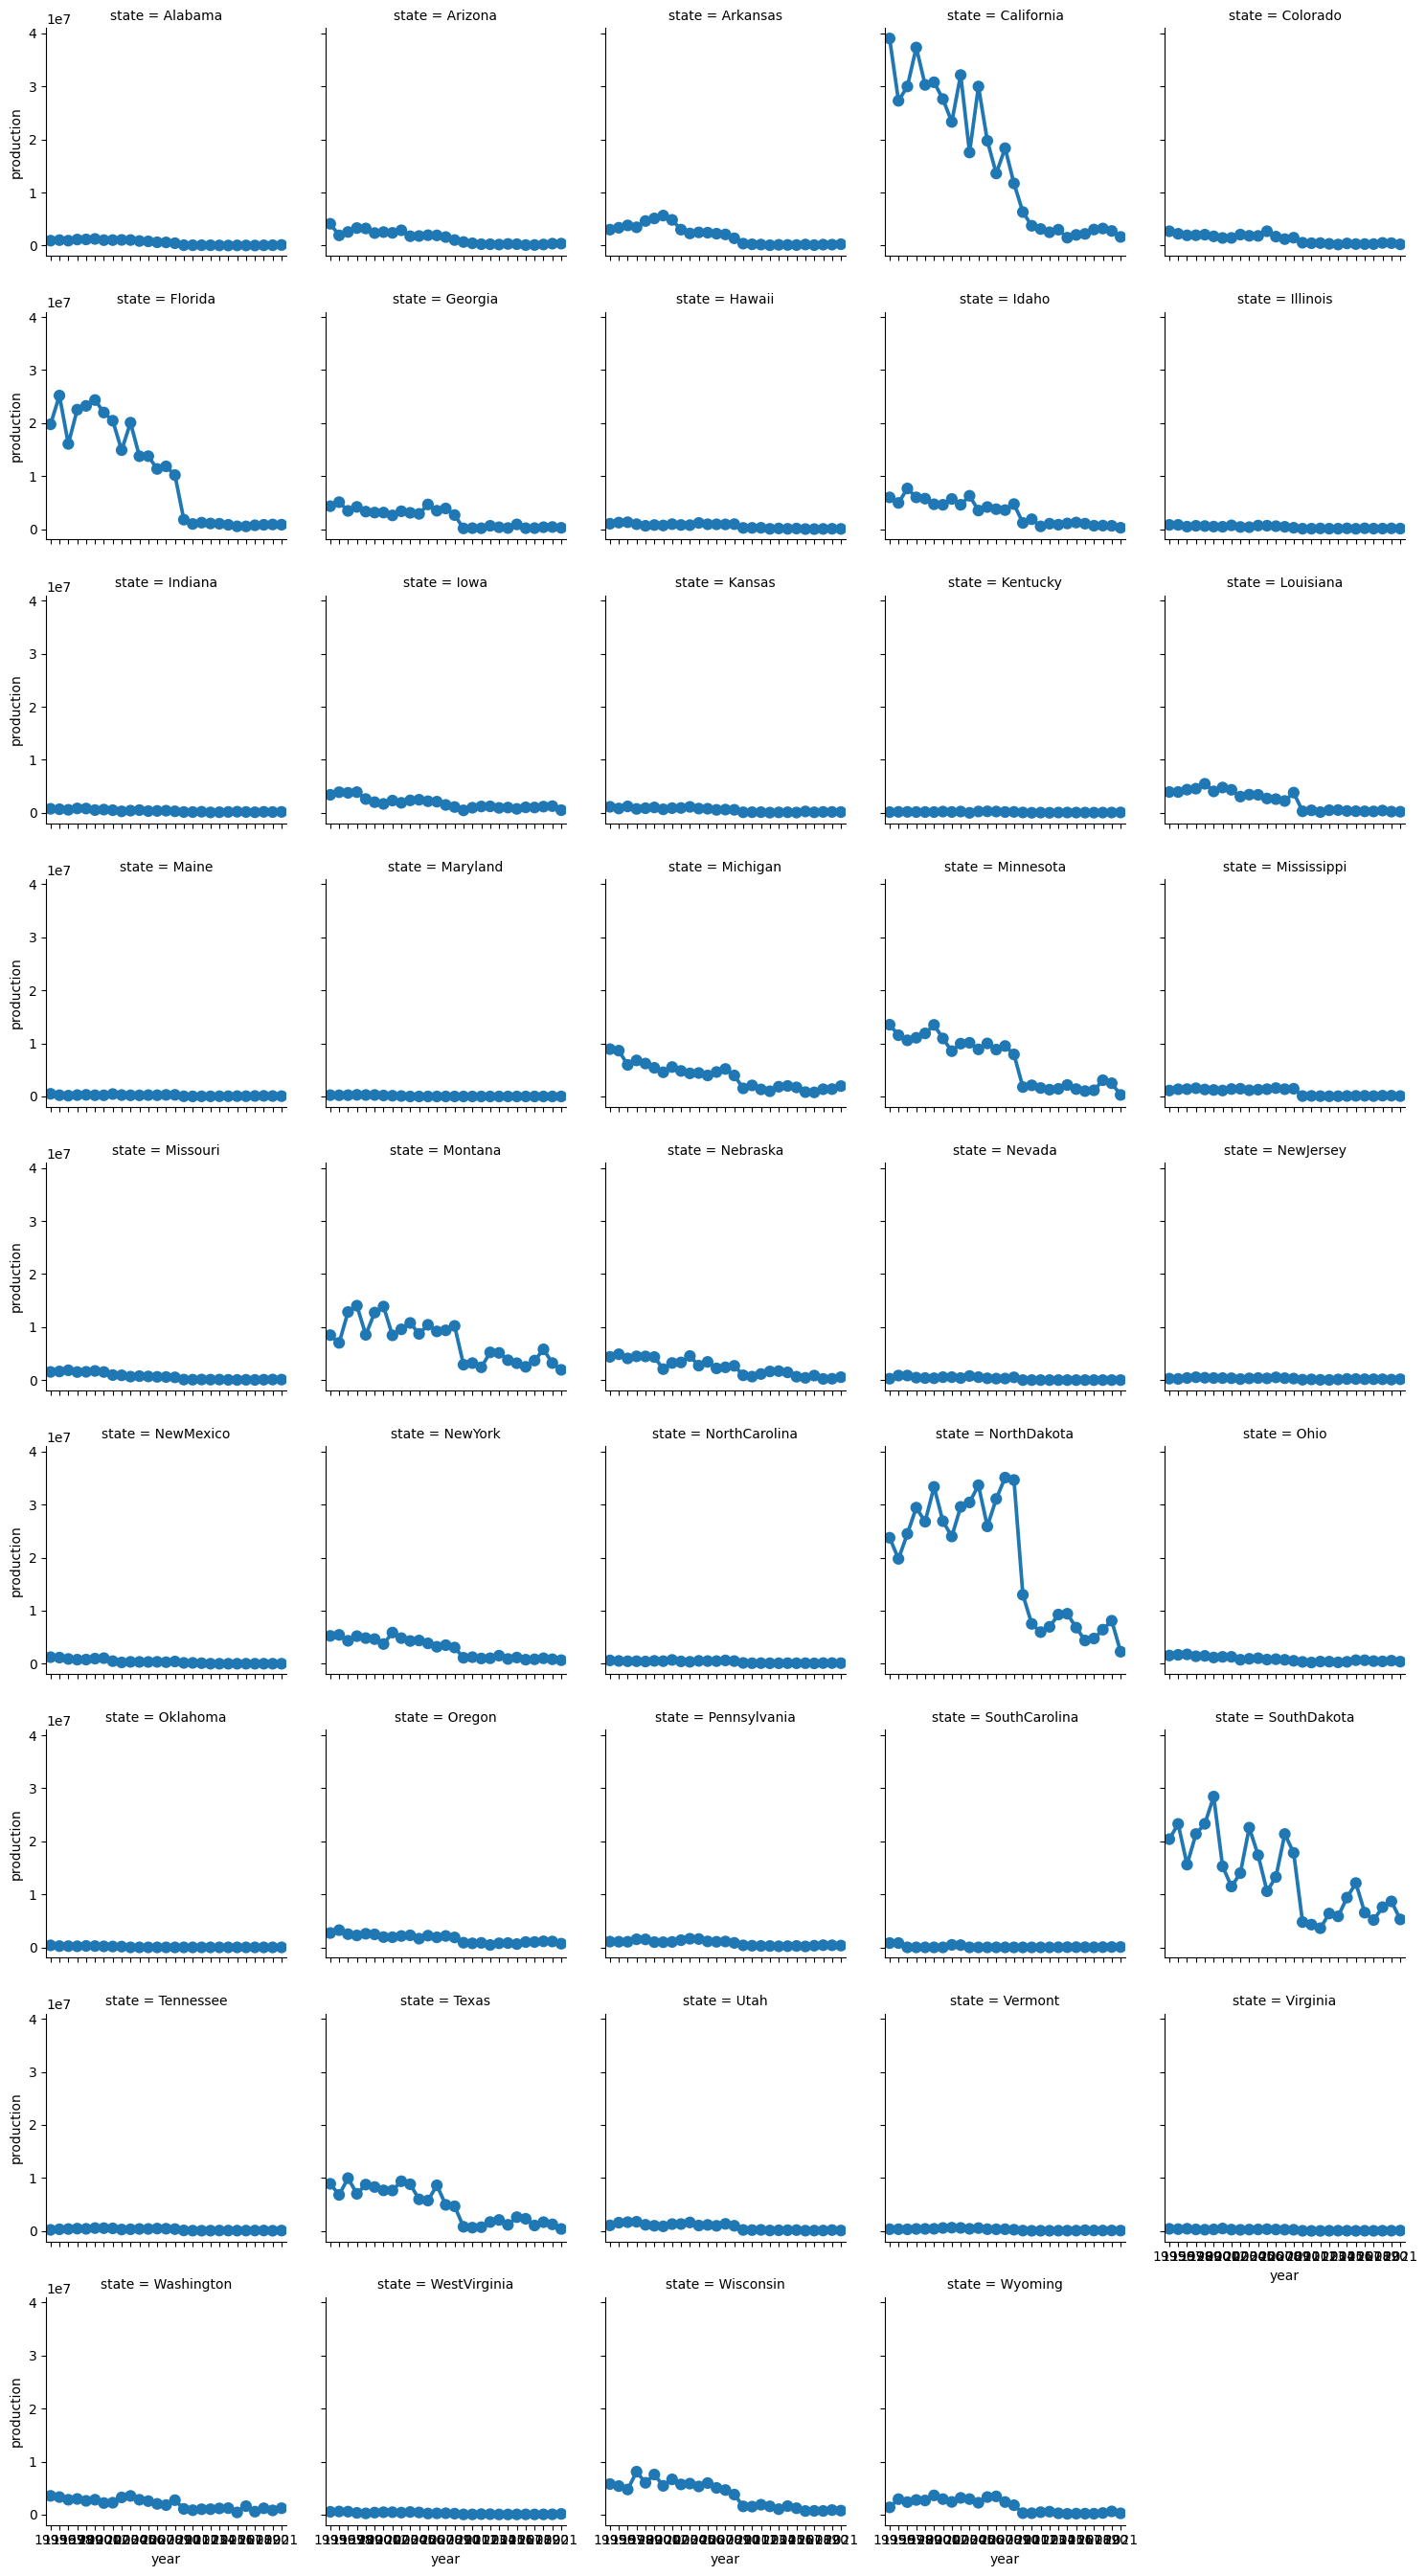

In [ ]:
sns.catplot(x='year', y='production', data= df,
                estimator=sum, col='state', kind="point",height=3,col_wrap = 5
                )

In [ ]:
# the following code to look at the top 5 honey producing states in the US
df.groupby(['state'])['production'].sum().sort_values(ascending = False).reset_index().head()

,state,production
0,NorthDakota,513742000
1,California,423876000
2,SouthDakota,355726000
3,Florida,280934000
4,Montana,197173000


# Let us look at the yearly trend in number of colonies and yield per colony in these 5 states

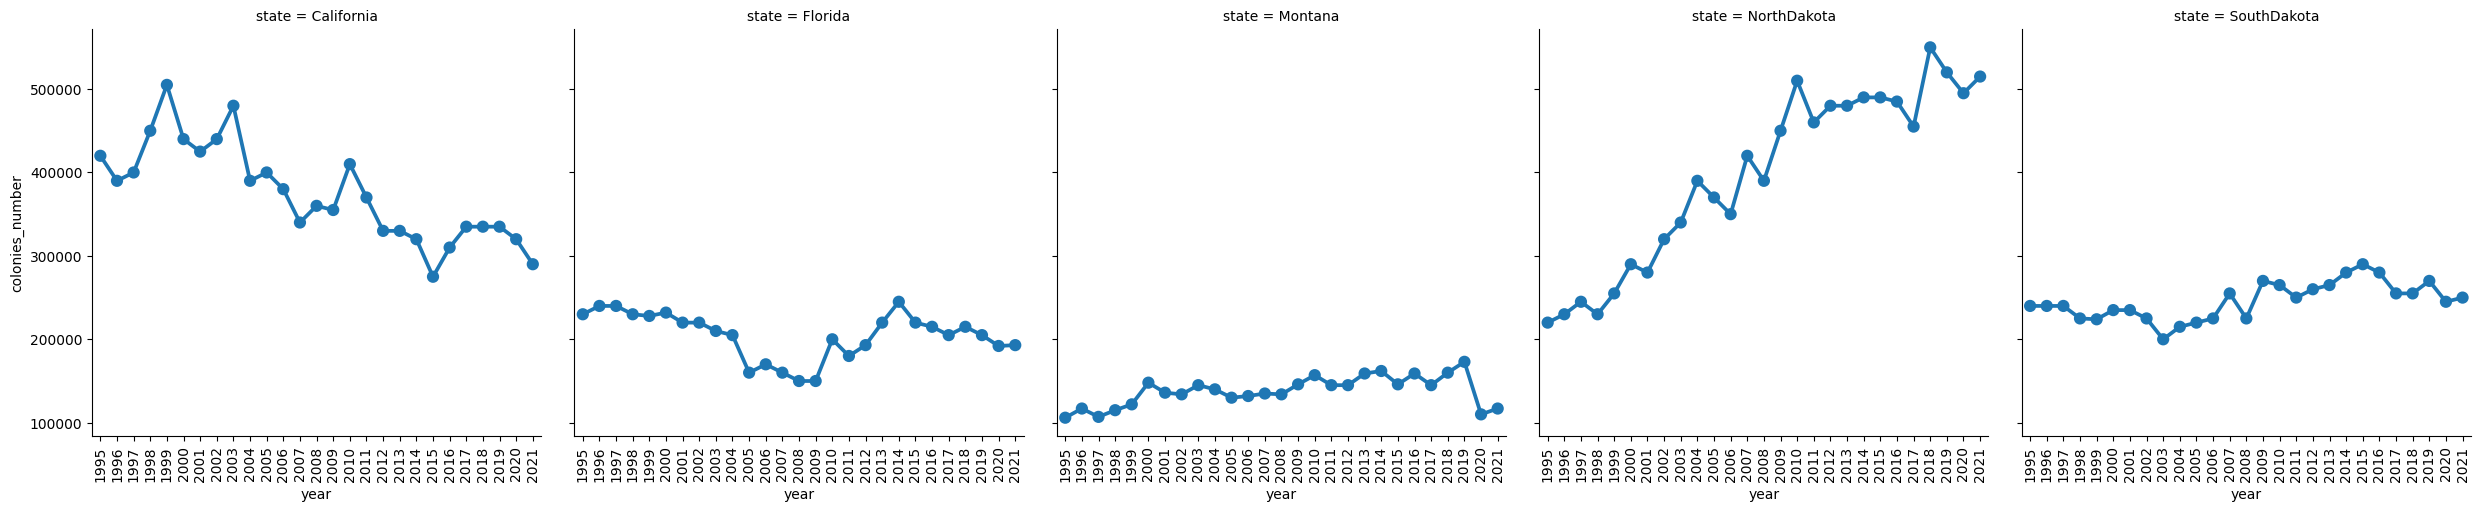

In [ ]:
cplot1=sns.catplot(x='year', y='colonies_number',
            data=df[df["state"].isin(["NorthDakota","California","SouthDakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point")
cplot1.set_xticklabels(rotation=90)
plt.show()

<ipython-input-61-cd783e5f61d1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="production", y="state", data=df.sort_values("production", ascending=False),
<ipython-input-61-cd783e5f61d1>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="stocks", y="state", data=df.sort_values("production", ascending=False),


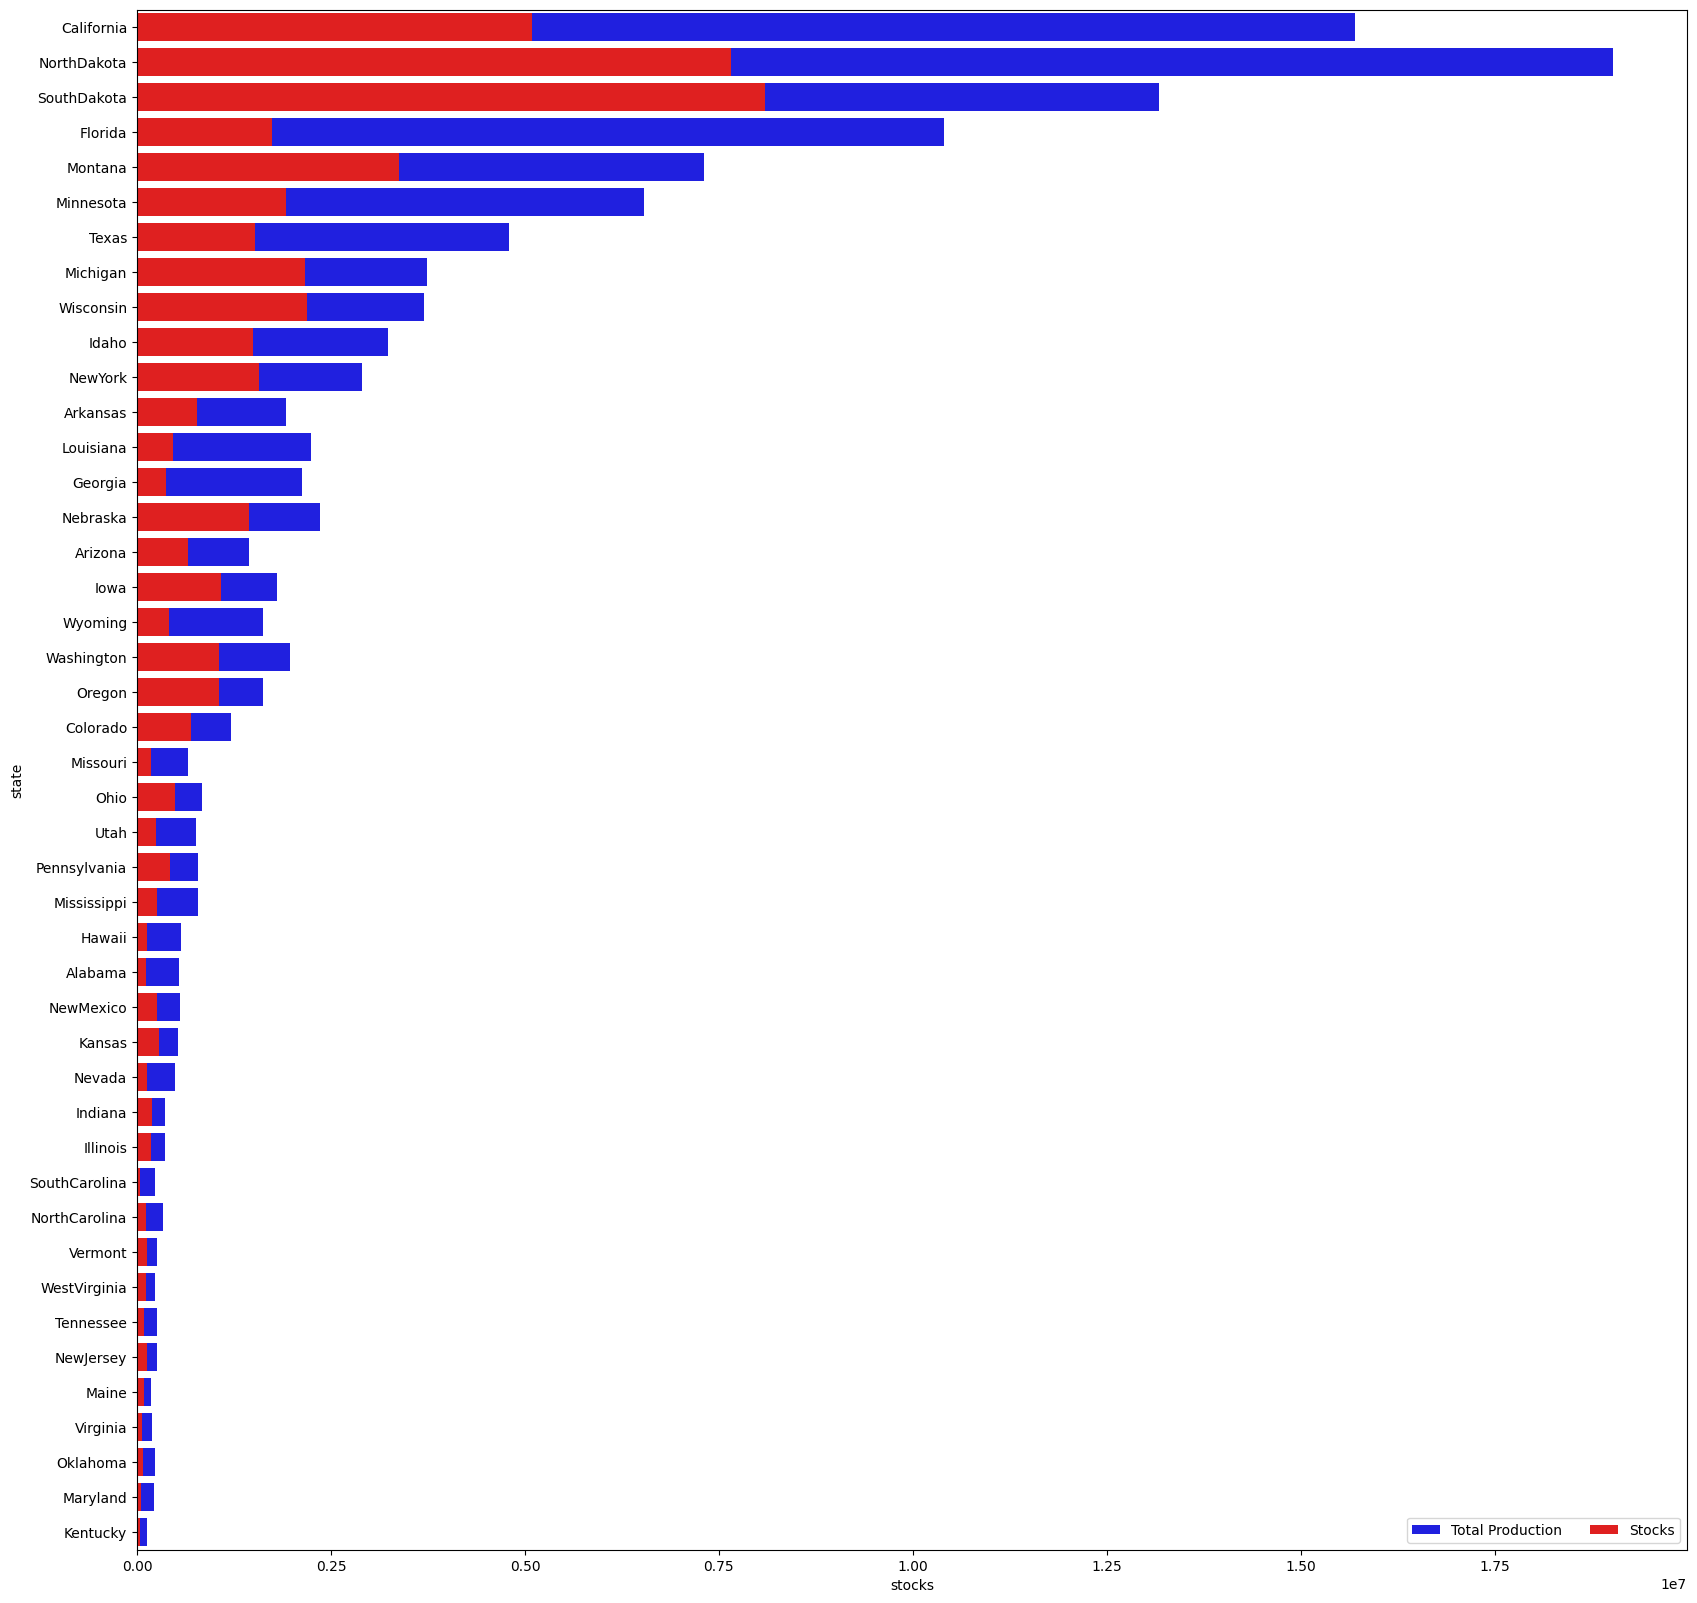

In [ ]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="production", y="state", data=df.sort_values("production", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=df.sort_values("production", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()